In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt

from PIL import Image
from matplotlib.lines import Line2D
from wordcloud import WordCloud, get_single_color_func


sns.set(style="darkgrid", font_scale=1.5)

In [2]:
df = pd.read_csv("csv/cars.csv")

In [3]:
# weight of the vehicle is in pounds (lbs)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 7 columns):
model         392 non-null object
MPG           392 non-null float64
cylinders     392 non-null int64
horsepower    392 non-null int64
weigth        392 non-null int64
year          392 non-null int64
origin        392 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 21.5+ KB


In [4]:
df.sample(10)

,model,MPG,cylinders,horsepower,weigth,year,origin
72,chevrolet chevelle concours (sw),13.0,8,130,4098,72,US
328,subaru dl,33.8,4,67,2145,80,Japan
225,plymouth volare custom,19.0,6,100,3630,77,US
146,fiat 124 tc,26.0,4,75,2246,74,Europe
97,chevrolet nova custom,16.0,6,100,3278,73,US
162,buick skyhawk,21.0,6,110,3039,75,US
0,chevrolet chevelle malibu,18.0,8,130,3504,70,US
115,pontiac grand prix,16.0,8,230,4278,73,US
293,dodge colt hatchback custom,35.7,4,80,1915,79,US
186,dodge coronet brougham,16.0,8,150,4190,76,US


In [5]:
df.describe()

,MPG,cylinders,horsepower,weigth,year
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,104.469388,2977.584184,75.979592
std,7.805007,1.705783,38.491160,849.402560,3.683737
min,9.000000,3.000000,46.000000,1613.000000,70.000000
25%,17.000000,4.000000,75.000000,2225.250000,73.000000
50%,22.750000,4.000000,93.500000,2803.500000,76.000000
75%,29.000000,8.000000,126.000000,3614.750000,79.000000
max,46.600000,8.000000,230.000000,5140.000000,82.000000


In [6]:
df.tail(5)

,model,MPG,cylinders,horsepower,weigth,year,origin
387,ford mustang gl,27.0,4,86,2790,82,US
388,vw pickup,44.0,4,52,2130,82,Europe
389,dodge rampage,32.0,4,84,2295,82,US
390,ford ranger,28.0,4,79,2625,82,US
391,chevy s-10,31.0,4,82,2720,82,US


In [7]:
np.sort(df["horsepower"].unique())

array([ 46,  48,  49,  52,  53,  54,  58,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  74,  75,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98, 100, 102, 103, 105, 107, 108, 110,
       112, 113, 115, 116, 120, 122, 125, 129, 130, 132, 133, 135, 137,
       138, 139, 140, 142, 145, 148, 149, 150, 152, 153, 155, 158, 160,
       165, 167, 170, 175, 180, 190, 193, 198, 200, 208, 210, 215, 220,
       225, 230])

In [8]:
df["year"].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [9]:
df["cylinders"].value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [10]:
df["MPG"].value_counts()

13.0    20
14.0    19
18.0    17
15.0    16
26.0    14
16.0    13
19.0    12
24.0    11
22.0    10
25.0    10
28.0    10
23.0     9
27.0     9
20.0     9
29.0     8
31.0     7
17.0     7
30.0     7
21.0     7
36.0     6
12.0     6
32.0     6
15.5     5
17.5     5
38.0     4
11.0     4
20.2     4
33.0     3
18.5     3
16.5     3
        ..
39.4     1
43.1     1
24.2     1
32.7     1
44.6     1
16.9     1
20.8     1
16.2     1
34.4     1
43.4     1
39.1     1
32.1     1
37.2     1
38.1     1
30.9     1
37.3     1
34.7     1
22.3     1
27.5     1
34.5     1
41.5     1
35.7     1
34.2     1
23.5     1
39.0     1
30.7     1
31.9     1
44.0     1
28.8     1
27.4     1
Name: MPG, Length: 127, dtype: int64

In [11]:
df.head(5)

,model,MPG,cylinders,horsepower,weigth,year,origin
0,chevrolet chevelle malibu,18.0,8,130,3504,70,US
1,buick skylark 320,15.0,8,165,3693,70,US
2,plymouth satellite,18.0,8,150,3436,70,US
3,amc rebel sst,16.0,8,150,3433,70,US
4,ford torino,17.0,8,140,3449,70,US


In [12]:
df["origin"].value_counts()

US        245
Japan      79
Europe     68
Name: origin, dtype: int64

In [13]:
df["model"].value_counts()

amc matador                          5
ford pinto                           5
toyota corolla                       5
chevrolet impala                     4
chevrolet chevette                   4
toyota corona                        4
amc hornet                           4
ford maverick                        4
peugeot 504                          4
amc gremlin                          4
ford galaxie 500                     3
plymouth duster                      3
honda civic                          3
chevrolet caprice classic            3
chevrolet vega                       3
plymouth fury iii                    3
ford gran torino                     3
volkswagen dasher                    3
pontiac catalina                     3
dodge colt                           3
chevrolet nova                       3
chevrolet citation                   3
ford gran torino (sw)                2
amc matador (sw)                     2
honda civic cvcc                     2
datsun 710               

In [14]:
df["parent_company"] = np.nan

In [15]:
# Derive a new feature called "parent company" from the car model name

In [16]:
df["parent_company"] = df["model"].str.split(n=1, expand = True)[0]

In [17]:
(df["parent_company"].value_counts())

ford             48
chevrolet        43
plymouth         31
dodge            28
amc              27
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
oldsmobile       10
mazda            10
fiat              8
peugeot           8
audi              7
vw                6
volvo             6
chrysler          6
subaru            4
saab              4
opel              4
renault           3
chevy             3
mercedes-benz     2
cadillac          2
maxda             2
bmw               2
triumph           1
toyouta           1
hi                1
mercedes          1
nissan            1
chevroelt         1
vokswagen         1
capri             1
Name: parent_company, dtype: int64

In [18]:
df.sample(10)

,model,MPG,cylinders,horsepower,weigth,year,origin,parent_company
125,amc hornet,19.0,6,100,2901,74,US,amc
212,ford f108,13.0,8,130,3870,76,US,ford
45,chevrolet vega (sw),22.0,4,72,2408,71,US,chevrolet
1,buick skylark 320,15.0,8,165,3693,70,US,buick
273,volvo 264gl,17.0,6,125,3140,78,Europe,volvo
296,cadillac eldorado,23.0,8,125,3900,79,US,cadillac
332,triumph tr7 coupe,35.0,4,88,2500,80,Europe,triumph
84,buick century 350,13.0,8,175,4100,73,US,buick
337,chevrolet citation,23.5,6,110,2725,81,US,chevrolet
239,datsun 810,22.0,6,97,2815,77,Japan,datsun


In [19]:
for col in list(df.columns):
    print("{}: {}/{} number of unique items ({})".format(col, df[str(col)].nunique(), df[str(col)].count(), df[str(col)].isnull().sum()))

model: 301/392 number of unique items (0)
MPG: 127/392 number of unique items (0)
cylinders: 5/392 number of unique items (0)
horsepower: 93/392 number of unique items (0)
weigth: 346/392 number of unique items (0)
year: 13/392 number of unique items (0)
origin: 3/392 number of unique items (0)
parent_company: 37/392 number of unique items (0)


In [20]:
plt.rcParams['figure.figsize'] = [18, 10]

/home/tharangni/Documents/misc/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


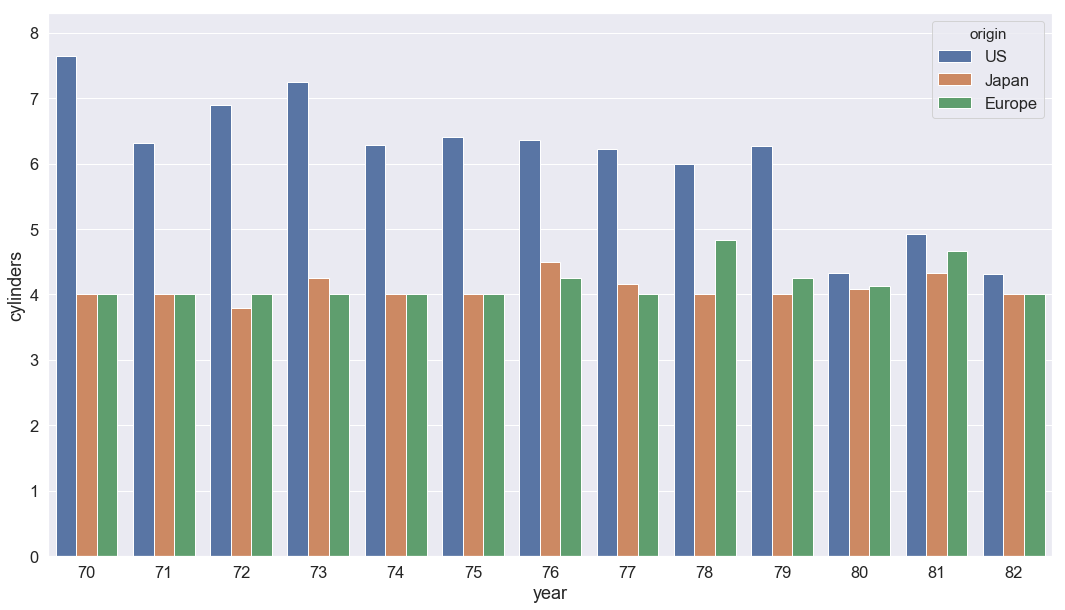

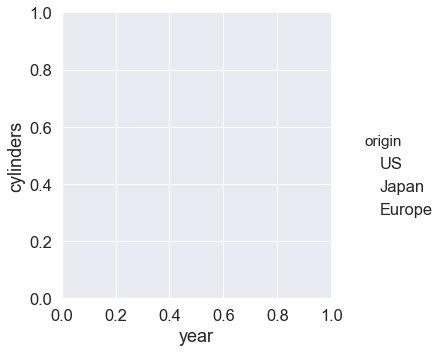

In [21]:
fig, ax = plt.subplots(figsize=(18,10))
sns.catplot(x = "year", y = "cylinders", data=df, hue="origin", kind="bar", dodge=True, ax=ax, errwidth=0)
# plt.savefig(fname = "oops.JPEG", transparent=True)

In [22]:
# distribution of number of cars by mileage
# df["MPG"].plot.hist()
# plt.plot()

# ax = sns.distplot(df["origin"], hist=True, kde=False, hist_kws=dict(edgecolor="black", alpha=0.5, linewidth=2))
# ax.set_xlabel("Origin")
# ax.set_ylabel("Number of Cars")
# ax.set_title("Distribution of Cars by mileage (MPG)")

/home/tharangni/Documents/misc/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Cars by mileage (MPG)')

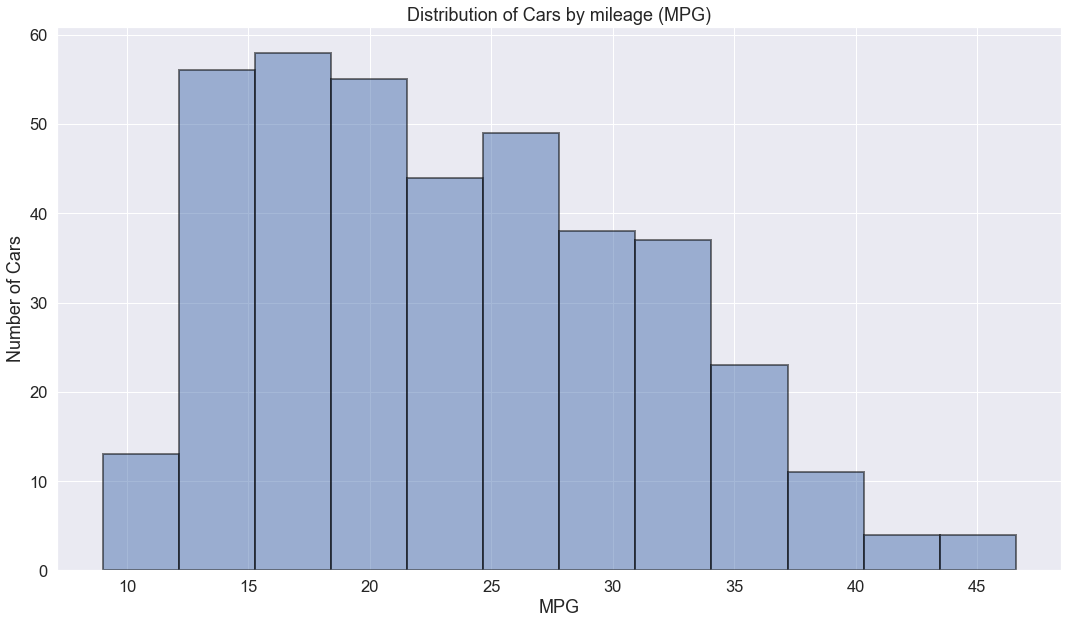

In [23]:
# distribution of number of cars by mileage
# df["MPG"].plot.hist()
# plt.plot()

ax = sns.distplot(df["MPG"], hist=True, kde=False, hist_kws=dict(edgecolor="black", alpha=0.5, linewidth=2))
ax.set_xlabel("MPG")
ax.set_ylabel("Number of Cars")
ax.set_title("Distribution of Cars by mileage (MPG)")

/home/tharangni/Documents/misc/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Cars by Number of Cylinders')

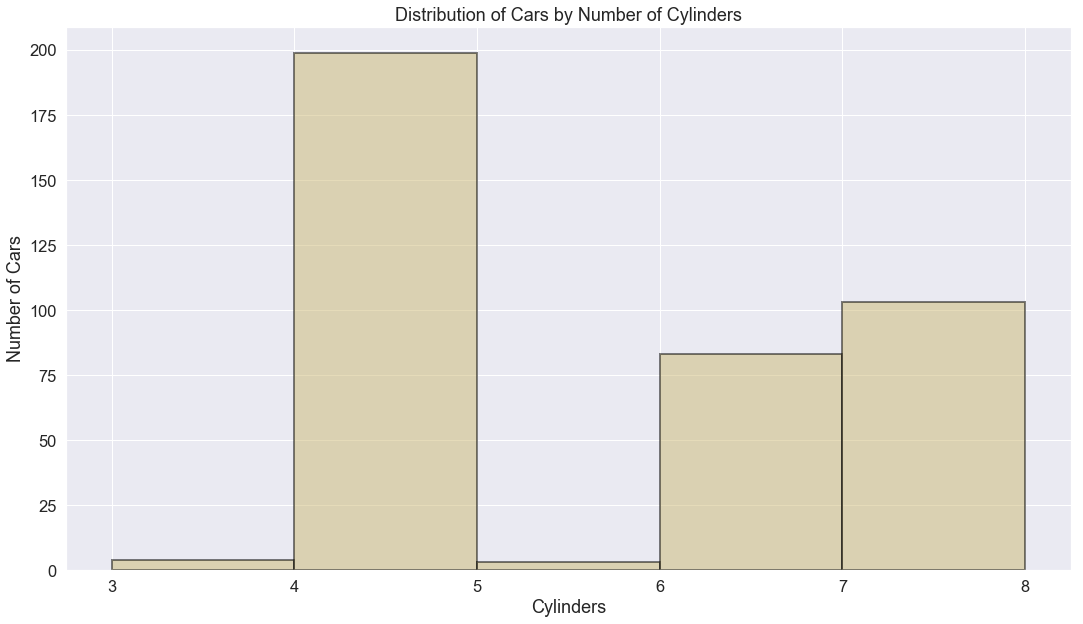

In [24]:
# distribution of number of cars by cylinders
# df["cyliners"].plot.hist()

ax = sns.distplot(df["cylinders"], hist=True, kde=False, hist_kws=dict(edgecolor="black", alpha=0.5, linewidth=2), color="y")
ax.set_xlabel("Cylinders")
ax.set_ylabel("Number of Cars")
ax.set_title("Distribution of Cars by Number of Cylinders")

/home/tharangni/Documents/misc/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Cars by Number of Horsepower')

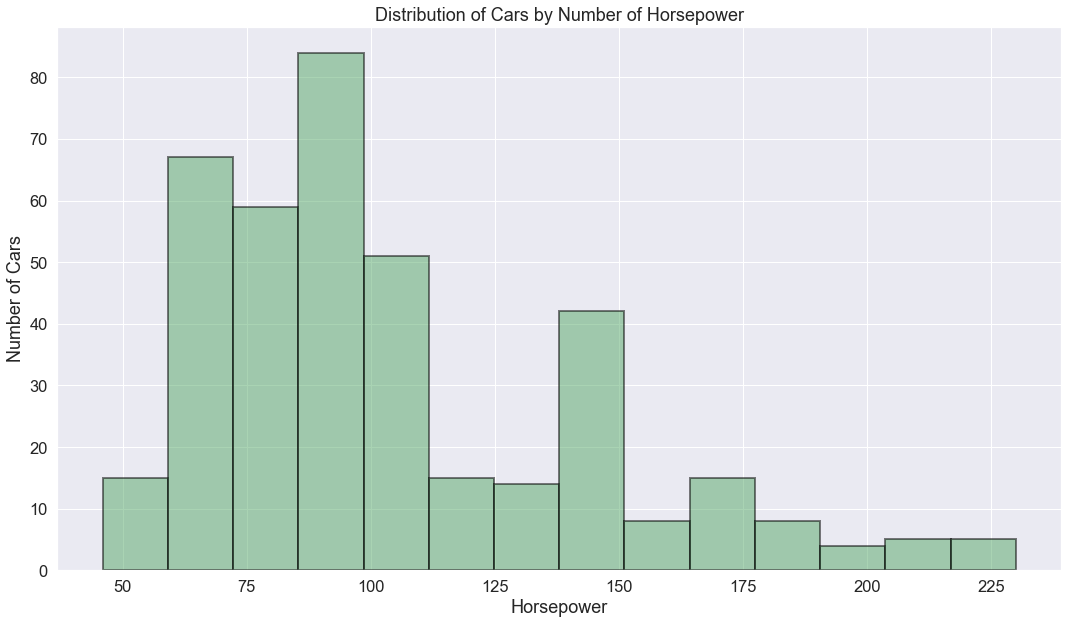

In [25]:
# distribution of number of cars by horsepower
# df["horsepower"].plot.hist()

ax = sns.distplot(df["horsepower"], hist=True, kde=False, hist_kws=dict(edgecolor="black", alpha=0.5, linewidth=2), color="g")
ax.set_xlabel("Horsepower")
ax.set_ylabel("Number of Cars")
ax.set_title("Distribution of Cars by Number of Horsepower")

/home/tharangni/Documents/misc/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Cars by Year Manufactured')

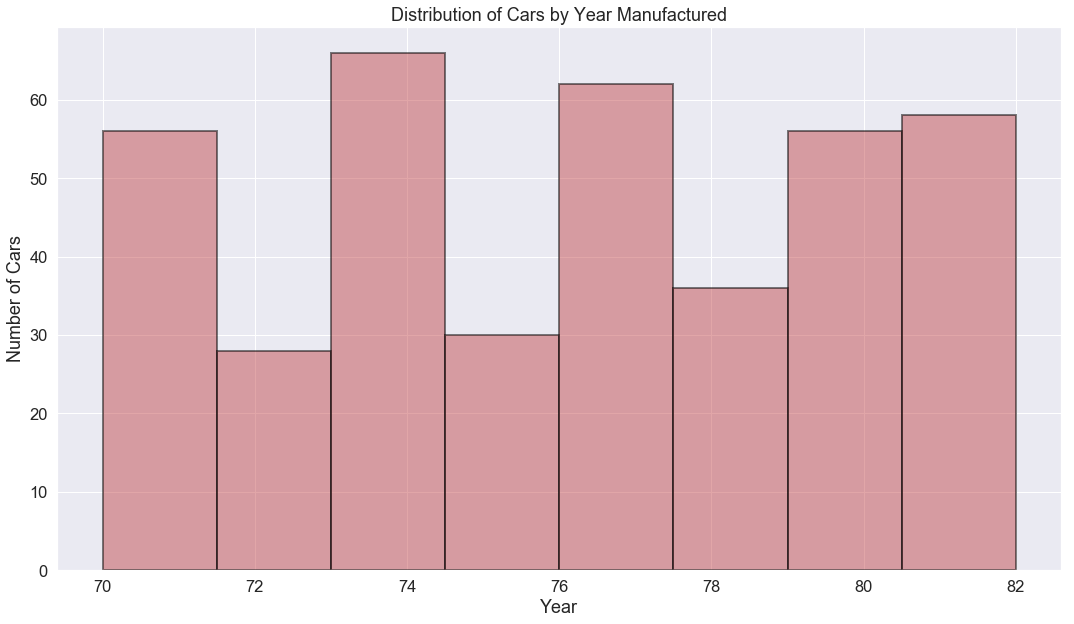

In [26]:
# distribution of number of cars by year manufactured
# df["year"].plot.hist()

ax = sns.distplot(df["year"], hist=True, kde=False, hist_kws=dict(edgecolor="black", alpha=0.5, linewidth=2), color="r")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Cars")
ax.set_title("Distribution of Cars by Year Manufactured")

/home/tharangni/Documents/misc/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Distribution of Cars by Weight')

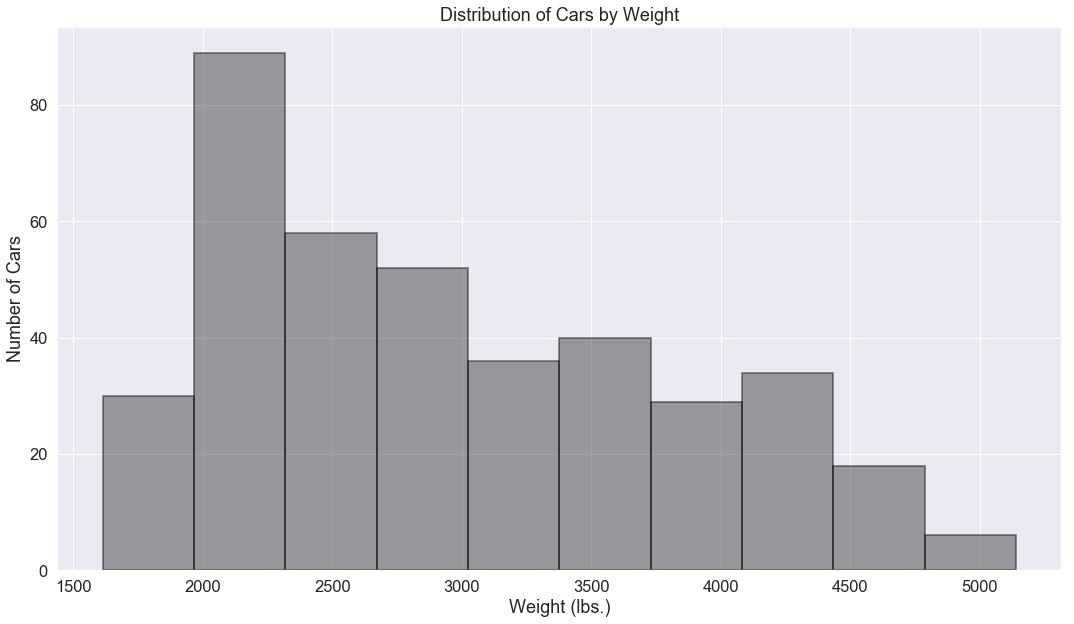

In [27]:
# distribution of number of cars by weight
# df["weigth"].plot.hist()

ax = sns.distplot(df["weigth"], hist=True, kde=False, hist_kws=dict(edgecolor="black", alpha=0.4, linewidth=2), color="k")
ax.set_xlabel("Weight (lbs.)")
ax.set_ylabel("Number of Cars")
ax.set_title("Distribution of Cars by Weight")

In [28]:
# correlation

print(df["horsepower"].corr(df["MPG"]))
print(df["cylinders"].corr(df["MPG"]))
print(df["weigth"].corr(df["MPG"]))

-0.7784267838977756
-0.7776175081260214
-0.8322442148315753


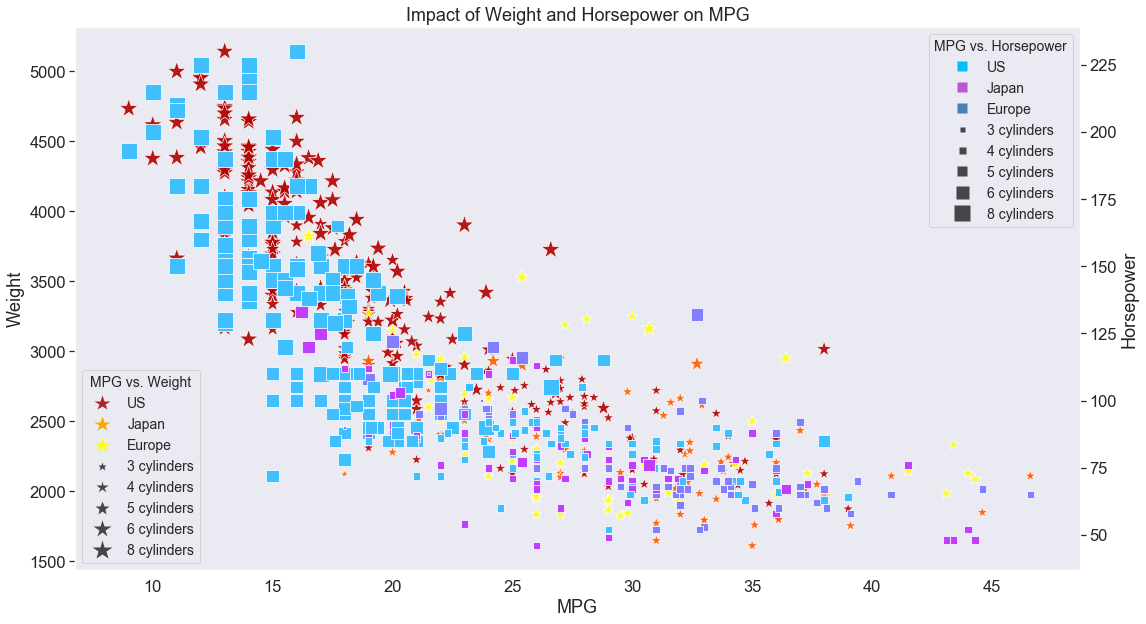

In [29]:
sns.set(style="dark", font_scale=1.5)
fig, ax = plt.subplots()

legend_elements_wt = [Line2D([0], [0], marker="*", markersize=16, label="US", markerfacecolor="firebrick", 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="*", markersize=16, label="Japan", markerfacecolor="orange", 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="*", markersize=16, label="Europe", markerfacecolor="yellow", 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="*", markersize=9, label="3 cylinders", markerfacecolor=(0,0,0,0.7), 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="*", markersize=12, label="4 cylinders", markerfacecolor=(0,0,0,0.7), 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="*", markersize=15, label="5 cylinders", markerfacecolor=(0,0,0,0.7), 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="*", markersize=18, label="6 cylinders", markerfacecolor=(0,0,0,0.7), 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="*", markersize=21, label="8 cylinders", markerfacecolor=(0,0,0,0.7), 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) )]

legend_elements_hp = [Line2D([0], [0], marker="s", markersize=10, label="US", markerfacecolor="deepskyblue", 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="s", markersize=10, label="Japan", markerfacecolor="mediumorchid", 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="s", markersize=10, label="Europe", markerfacecolor="steelblue", 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="s", markersize=5, label="3 cylinders", markerfacecolor=(0,0,0,0.7), 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="s", markersize=7, label="4 cylinders", markerfacecolor=(0,0,0,0.7), 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="s", markersize=10, label="5 cylinders", markerfacecolor=(0,0,0,0.7), 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="s", markersize=13, label="6 cylinders", markerfacecolor=(0,0,0,0.7), 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) ),
                   Line2D([0], [0], marker="s", markersize=16, label="8 cylinders", markerfacecolor=(0,0,0,0.7), 
                          color=(0,0,0,0), markeredgecolor=(0,0,0,0) )]


sns.scatterplot(x="MPG", y="weigth", marker="*", hue="origin", size="cylinders", 
                sizes=(75, 400), legend = "full", palette="hot", data=df, ax=ax, alpha=0.9)
ax.set_ylabel("Weight")
plt.legend(handles = legend_elements_wt, loc=3, title="MPG vs. Weight", fontsize=14, fancybox=True).get_title().set_fontsize('14')

ax2 = ax.twinx()
sns.scatterplot(x="MPG", y="horsepower", hue="origin", size="cylinders", 
                sizes=(10, 250), legend = "full", palette="cool", data=df, marker="s", ax=ax2, alpha=1)
ax2.set_ylabel("Horsepower")
ax2.set_title("Impact of Weight and Horsepower on MPG")
plt.legend(handles = legend_elements_hp, title="MPG vs. Horsepower", fontsize=14, fancybox=True).get_title().set_fontsize('14')
plt.show()

Text(0,0.5,'')

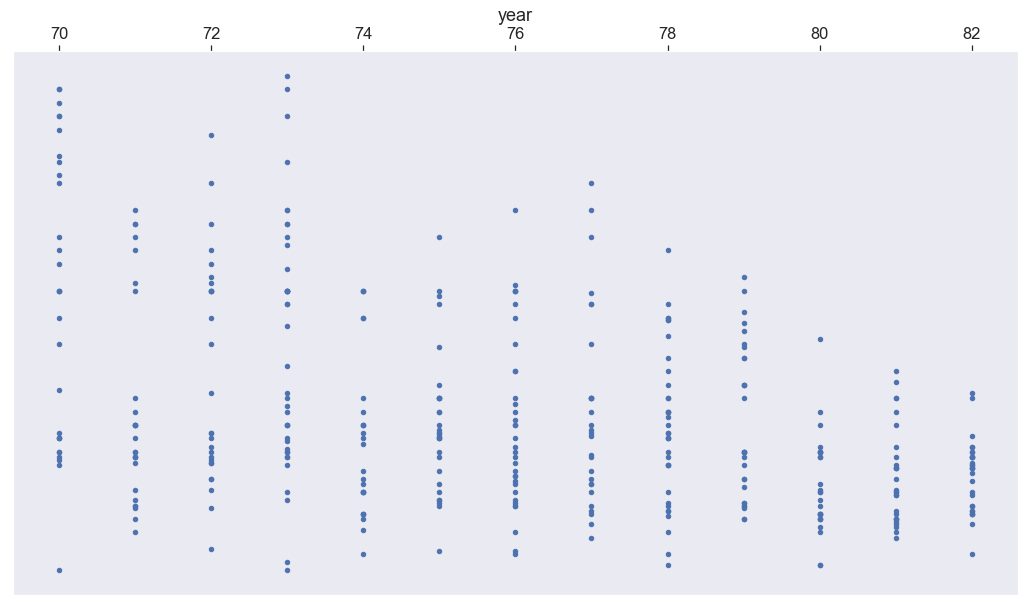

In [30]:
# plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
# plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

fig, ax = plt.subplots()
df.plot(kind="scatter", x = "year", y="horsepower", ax= ax)
ax.xaxis.tick_top()
ax.set_xlabel(xlabel="")
ax.set_title("year", pad = 30)
ax.set_yticklabels("")
ax.set_ylabel(ylabel="")

Text(0.5,1,'Impact of Horsepower on MPG')

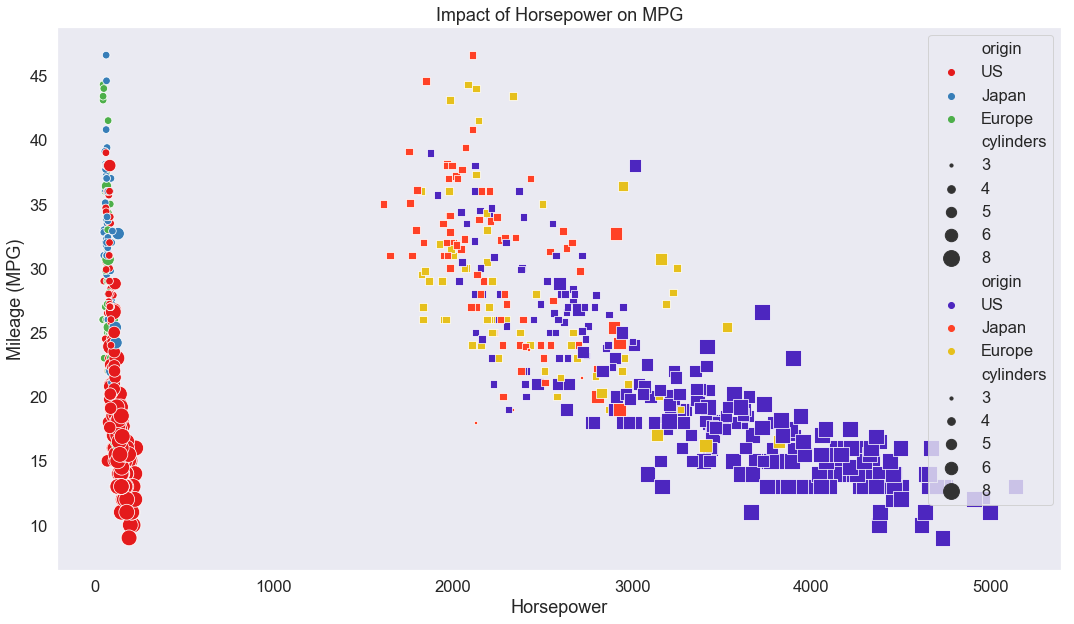

In [31]:
ax = sns.scatterplot(x="horsepower", y="MPG", hue="origin", size="cylinders", 
                sizes=(10, 250), legend = "full", palette="Set1", data=df)

_ = sns.scatterplot(x="weigth", y="MPG", hue="origin", size="cylinders", 
                sizes=(10, 250), legend = "full", palette="CMRmap", data=df, marker="s", ax=ax)
# ax.set_xlabel("Weight (lbs.)")
# ax.set_ylabel("Mileage (MPG)")
# ax.set_title("Impact of Weight of car on MPG")

ax.set_xlabel("Horsepower")
ax.set_ylabel("Mileage (MPG)")
ax.set_title("Impact of Horsepower on MPG")

Text(0.5,1,'Impact of Weight of car on MPG')

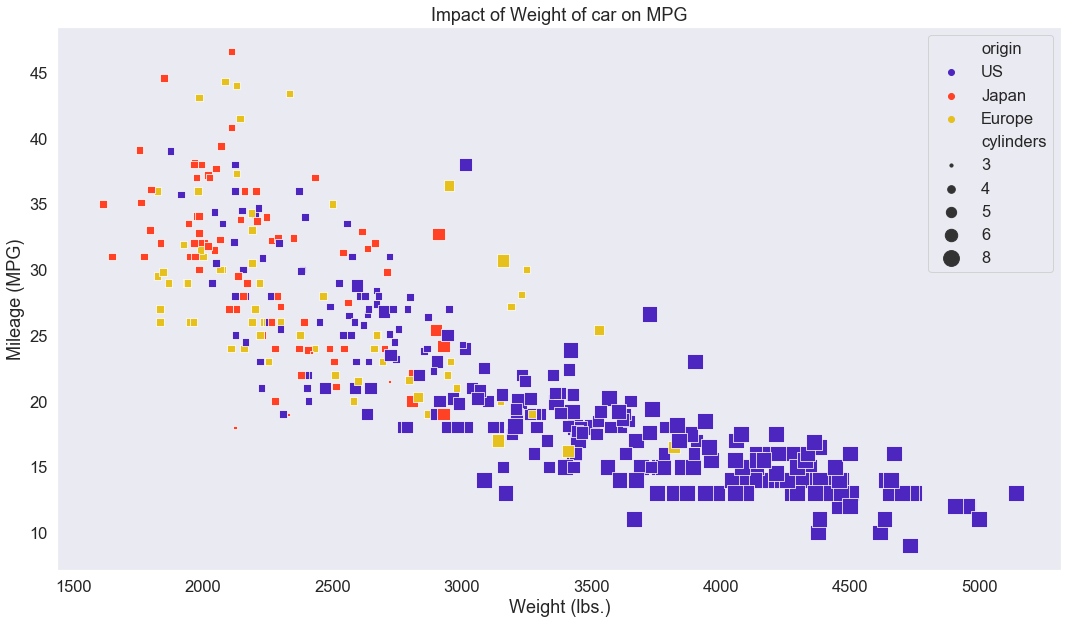

In [32]:
ax = sns.scatterplot(x="weigth", y="MPG", hue="origin", size="cylinders", 
                sizes=(10, 250), legend = "full", palette="CMRmap", data=df, marker="s")
ax.set_xlabel("Weight (lbs.)")
ax.set_ylabel("Mileage (MPG)")
ax.set_title("Impact of Weight of car on MPG")

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 8 columns):
model             392 non-null object
MPG               392 non-null float64
cylinders         392 non-null int64
horsepower        392 non-null int64
weigth            392 non-null int64
year              392 non-null int64
origin            392 non-null object
parent_company    392 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 24.6+ KB


/home/tharangni/Documents/misc/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


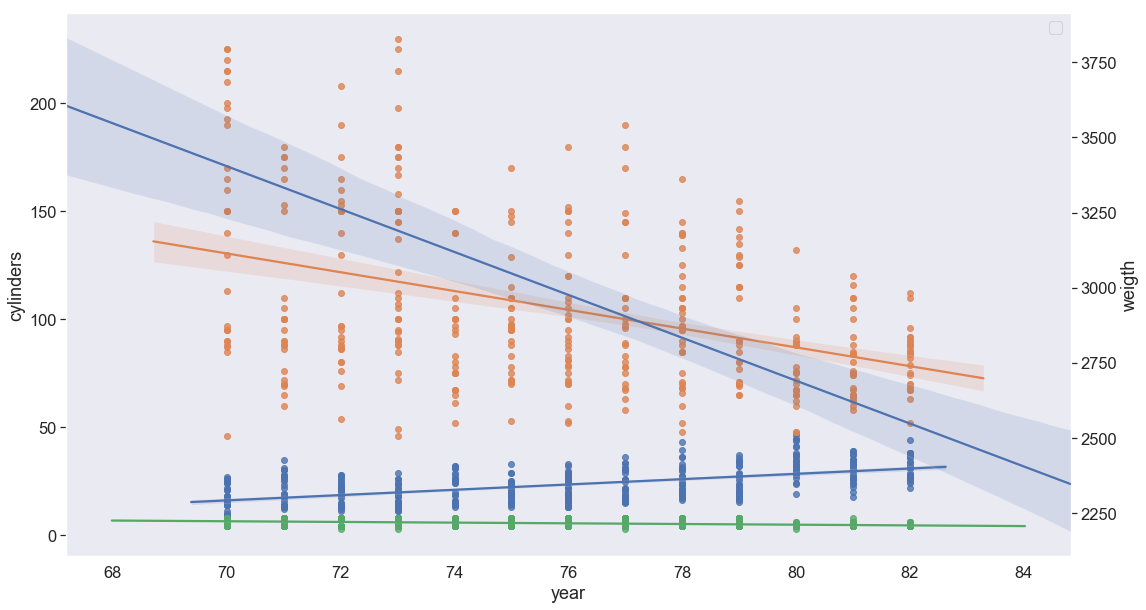

In [34]:
# Temporal representation

fig, ax = plt.subplots()
sns.regplot(x="year", y="MPG", data=df, scatter=True)
sns.regplot(x="year", y="horsepower", data=df, scatter=True, ax=ax)
sns.regplot(x="year", y="cylinders", data=df, scatter=True, ax=ax)

ax2 = ax.twinx()
sns.regplot(x="year", y="weigth", data=df, scatter=False, ax=ax2)

# _ = sns.regplot(x="year", y="origin", data=df, scatter=True, ax=ax)
# _ = sns.regplot(x="year", y="weigth", data=df, scatter=False, ax=ax)
plt.legend()
# plot the same for multiple data
# ax.set_xlabel("Horsepower")
# ax.set_ylabel("Mileage (MPG)")
# ax.set_title("Impact of Horsepower of car on MPG")
plt.show()

/home/tharangni/Documents/misc/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


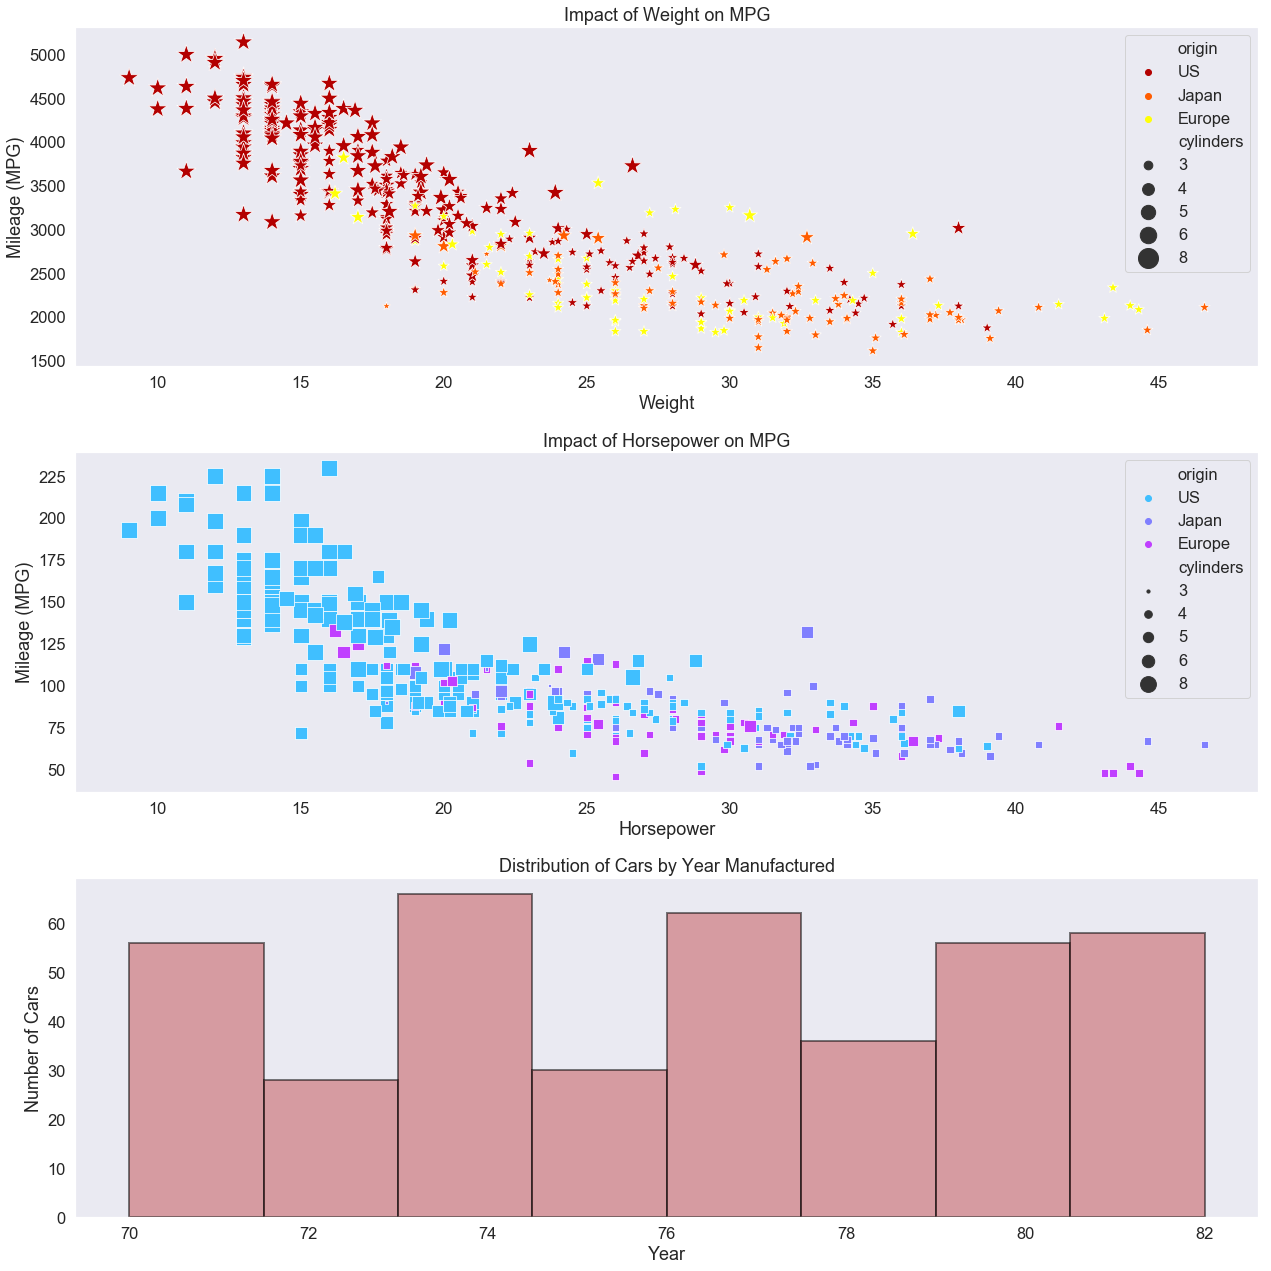

In [35]:
plt.figure(figsize=(18,18))
ax01 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax02 = plt.subplot2grid((3,3), (1,0), colspan=3)
ax03 = plt.subplot2grid((3,3), (2, 0), colspan=3)


sns.scatterplot(x="MPG", y="weigth", marker="*", hue="origin", size="cylinders", 
                sizes=(75, 400), legend = "full", palette="hot", data=df, ax=ax01, alpha=1)
ax01.set_xlabel("Weight")
ax01.set_ylabel("Mileage (MPG)")
ax01.set_title("Impact of Weight on MPG")

sns.scatterplot(x="MPG", y="horsepower", hue="origin", size="cylinders", 
                sizes=(10, 250), legend = "full", palette="cool", data=df, marker="s", ax=ax02, alpha=1)
ax02.set_xlabel("Horsepower")
ax02.set_ylabel("Mileage (MPG)")
ax02.set_title("Impact of Horsepower on MPG")

sns.distplot(df["year"], hist=True, kde=False, hist_kws=dict(edgecolor="black", alpha=0.5, linewidth=2), color="r", ax=ax03)
ax03.set_xlabel("Year")
ax03.set_ylabel("Number of Cars")
ax03.set_title("Distribution of Cars by Year Manufactured")
plt.tight_layout()


/home/tharangni/Documents/misc/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Impact of Weight of car on MPG')

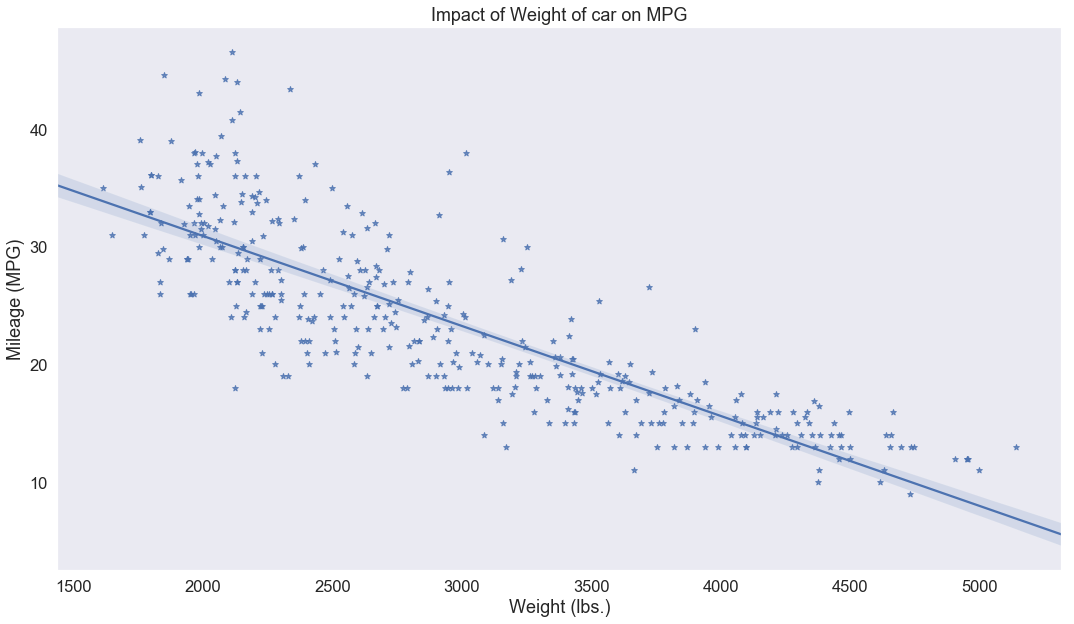

In [36]:
ax = sns.regplot(x="weigth", y="MPG", data=df, marker="*")
ax.set_xlabel("Weight (lbs.)")
ax.set_ylabel("Mileage (MPG)")
ax.set_title("Impact of Weight of car on MPG")

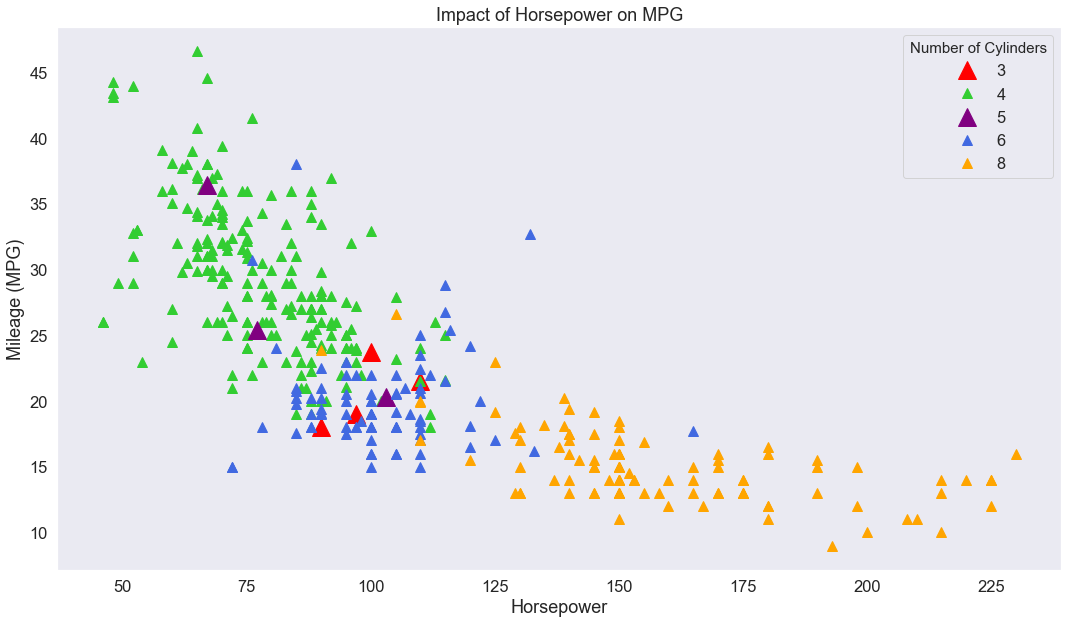

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df["horsepower"].where(df["cylinders"]==3), df["MPG"], color='red', label="3", marker="^", linestyle="", markersize=18)
ax.plot(df["horsepower"].where(df["cylinders"]==4), df["MPG"], color='limegreen', label="4", marker="^", linestyle="", markersize=10)
ax.plot(df["horsepower"].where(df["cylinders"]==5), df["MPG"], color='purple', label="5", marker="^", linestyle="", markersize=18)
ax.plot(df["horsepower"].where(df["cylinders"]==6), df["MPG"], color='royalblue', label="6", marker="^", linestyle="", markersize=10)
ax.plot(df["horsepower"].where(df["cylinders"]==8), df["MPG"], color='orange', label="8", marker="^", linestyle="", markersize=10)

handles, labels = ax.get_legend_handles_labels()
display = (0,1,2,3,4)

legend = plt.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], title="Number of Cylinders")

ax.set_xlabel("Horsepower")
ax.set_ylabel("Mileage (MPG)")
ax.set_title("Impact of Horsepower on MPG")
legend.get_title().set_fontsize("15")
plt.show()

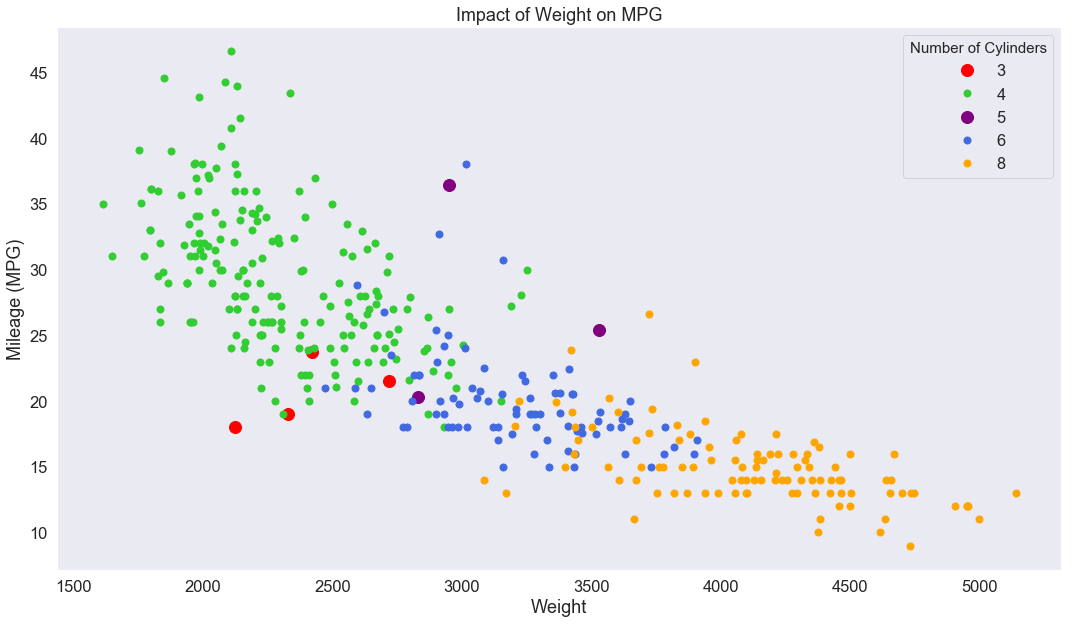

In [38]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df["weigth"].where(df["cylinders"]==3), df["MPG"], color='red', label="3", marker="o", linestyle="", markersize=12)
ax.plot(df["weigth"].where(df["cylinders"]==4), df["MPG"], color='limegreen', label="4", marker="o", linestyle="", markersize=7)
ax.plot(df["weigth"].where(df["cylinders"]==5), df["MPG"], color='purple', label="5", marker="o", linestyle="", markersize=12)
ax.plot(df["weigth"].where(df["cylinders"]==6), df["MPG"], color='royalblue', label="6", marker="o", linestyle="", markersize=7)
ax.plot(df["weigth"].where(df["cylinders"]==8), df["MPG"], color='orange', label="8", marker="o", linestyle="", markersize=7)

handles, labels = ax.get_legend_handles_labels()
display = (0,1,2,3,4)

legend = plt.legend([handle for i,handle in enumerate(handles) if i in display],
          [label for i,label in enumerate(labels) if i in display], title="Number of Cylinders")

ax.set_xlabel("Weight")
ax.set_ylabel("Mileage (MPG)")
ax.set_title("Impact of Weight on MPG")
legend.get_title().set_fontsize("15")
plt.show()

In [39]:
df["model"].where(df["horsepower"]>225)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
      ... 
362    NaN
363    NaN
364    NaN
365    NaN
366    NaN
367    NaN
368    NaN
369    NaN
370    NaN
371    NaN
372    NaN
373    NaN
374    NaN
375    NaN
376    NaN
377    NaN
378    NaN
379    NaN
380    NaN
381    NaN
382    NaN
383    NaN
384    NaN
385    NaN
386    NaN
387    NaN
388    NaN
389    NaN
390    NaN
391    NaN
Name: model, Length: 392, dtype: object

In [40]:
df.sample(5)

,model,MPG,cylinders,horsepower,weigth,year,origin,parent_company
356,toyota cressida,25.4,6,116,2900,81,Japan,toyota
89,mercury marquis brougham,12.0,8,198,4952,73,US,mercury
335,buick skylark,26.6,4,84,2635,81,US,buick
158,buick century,17.0,6,110,3907,75,US,buick
271,datsun 200-sx,23.9,4,97,2405,78,Japan,datsun


In [41]:
subset = df[["model", "parent_company", "origin"]]

In [42]:
g = subset.groupby(["origin", "parent_company"])["model"].nunique().reset_index()
b = g.sort_values(by="model")

In [43]:
b

,origin,parent_company,model
18,Japan,nissan,1
25,US,capri,1
26,US,chevroelt,1
10,Europe,vokswagen,1
21,Japan,toyouta,1
9,Europe,triumph,1
3,Europe,mercedes,1
32,US,hi,1
4,Europe,mercedes-benz,2
1,Europe,bmw,2


[Text(0,0,'nissan'),
 Text(0,0,'capri'),
 Text(0,0,'chevroelt'),
 Text(0,0,'vokswagen'),
 Text(0,0,'toyouta'),
 Text(0,0,'triumph'),
 Text(0,0,'mercedes'),
 Text(0,0,'hi'),
 Text(0,0,'mercedes-benz'),
 Text(0,0,'bmw'),
 Text(0,0,'maxda'),
 Text(0,0,'cadillac'),
 Text(0,0,'opel'),
 Text(0,0,'subaru'),
 Text(0,0,'renault'),
 Text(0,0,'saab'),
 Text(0,0,'chevy'),
 Text(0,0,'peugeot'),
 Text(0,0,'vw'),
 Text(0,0,'chrysler'),
 Text(0,0,'audi'),
 Text(0,0,'volvo'),
 Text(0,0,'fiat'),
 Text(0,0,'mazda'),
 Text(0,0,'honda'),
 Text(0,0,'oldsmobile'),
 Text(0,0,'mercury'),
 Text(0,0,'volkswagen'),
 Text(0,0,'pontiac'),
 Text(0,0,'buick'),
 Text(0,0,'amc'),
 Text(0,0,'toyota'),
 Text(0,0,'datsun'),
 Text(0,0,'plymouth'),
 Text(0,0,'chevrolet'),
 Text(0,0,'dodge'),
 Text(0,0,'ford')]

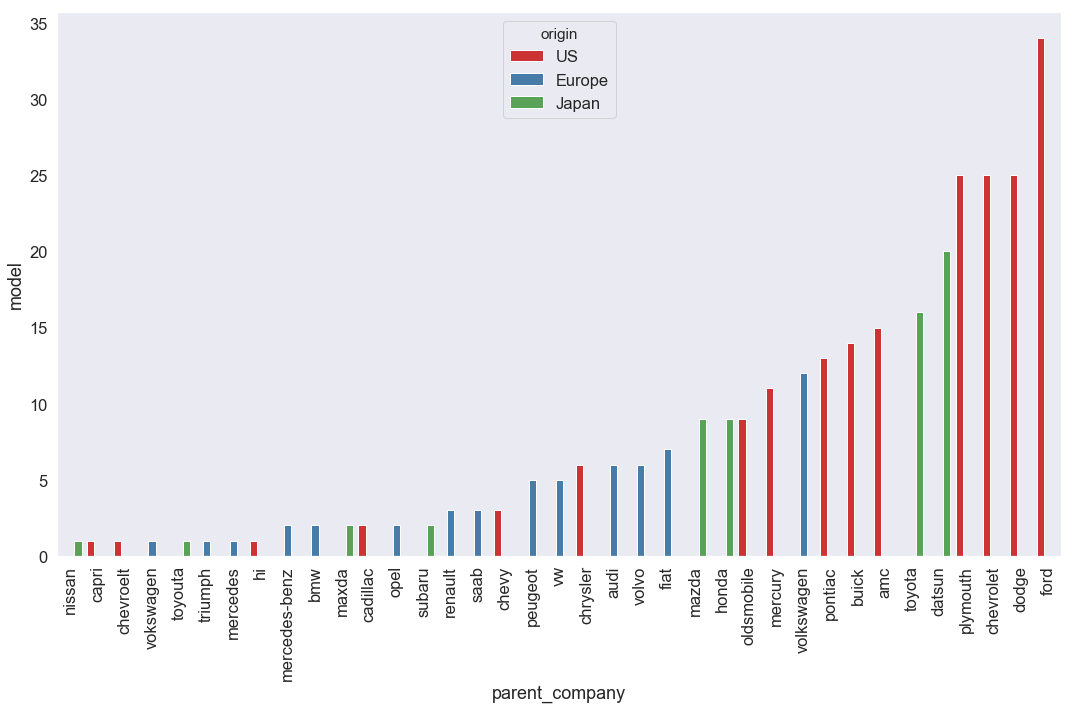

In [44]:
ax = sns.barplot(x="parent_company", y="model", hue="origin", data=b, palette="Set1", hue_order = ["US", "Europe", "Japan"])
ax.set_xticklabels(labels = b["parent_company"], rotation=90)

In [45]:
z = subset.groupby(by=["origin"], observed = True)

In [46]:
countries = ["US", "Europe", "Japan"]

In [47]:
subset2 = df[["origin", "model"]]

In [48]:
country_dict = {}
for key in countries:
    for value in subset2["model"].where(subset2["origin"]==key):
        if key not in country_dict.keys():
            country_dict[key] = []
        if not (isinstance(value, float)):
            country_dict[key].append(value.title().replace(' ', ''))

In [49]:
country_dict.keys()

dict_keys(['US', 'Europe', 'Japan'])

In [50]:
country_dict["red"] = country_dict.pop("US")
country_dict["green"] = country_dict.pop("Japan")
country_dict["blue"] = country_dict.pop("Europe")

In [51]:
class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [52]:
grouped_color_func = GroupedColorFunc(country_dict, default_color="white")

In [53]:
all_cars_nested = list(country_dict.values())
all_cars = [item for lst in all_cars_nested for item in lst]
str1 = ' '.join(all_cars)

In [54]:
wc = WordCloud(background_color="white",width=1400,height=1400, stopwords=["Sw"]).generate(str1)

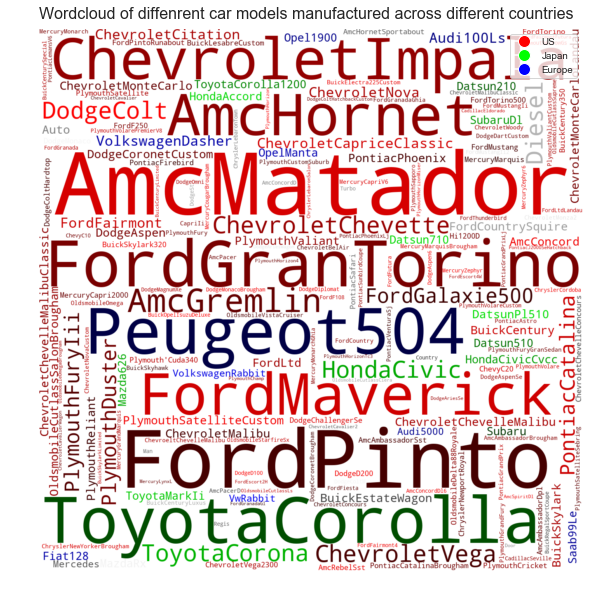

<Figure size 1296x720 with 0 Axes>

In [55]:
sns.set(style="white", font_scale=0.9)

fig, ax = plt.subplots()

fig = wc.recolor(color_func=grouped_color_func)

legend_elements = [Line2D([0], [0], marker='o', color='w', label='US',
                          markerfacecolor='#ff0000', markersize=12),
                   Line2D([0], [0], marker='o', color='w', label='Japan',
                          markerfacecolor='#00ff00', markersize=12),
                  Line2D([0], [0], marker='o', color='w', label='Europe',
                          markerfacecolor='#0000ff', markersize=12)]


ax.legend(handles=legend_elements, loc='best')

plt.figure()
ax.imshow(wc, interpolation="bilinear")
ax.text(x = 0, y= -25, s="Wordcloud of diffenrent car models manufactured across different countries", 
        bbox={'facecolor': 'white', 'pad': 1}, fontdict={'size':16})
ax.axis("off")
plt.tight_layout()

In [56]:
G=nx.from_pandas_edgelist(df = subset, source = "origin", target="parent_company", edge_attr=False)

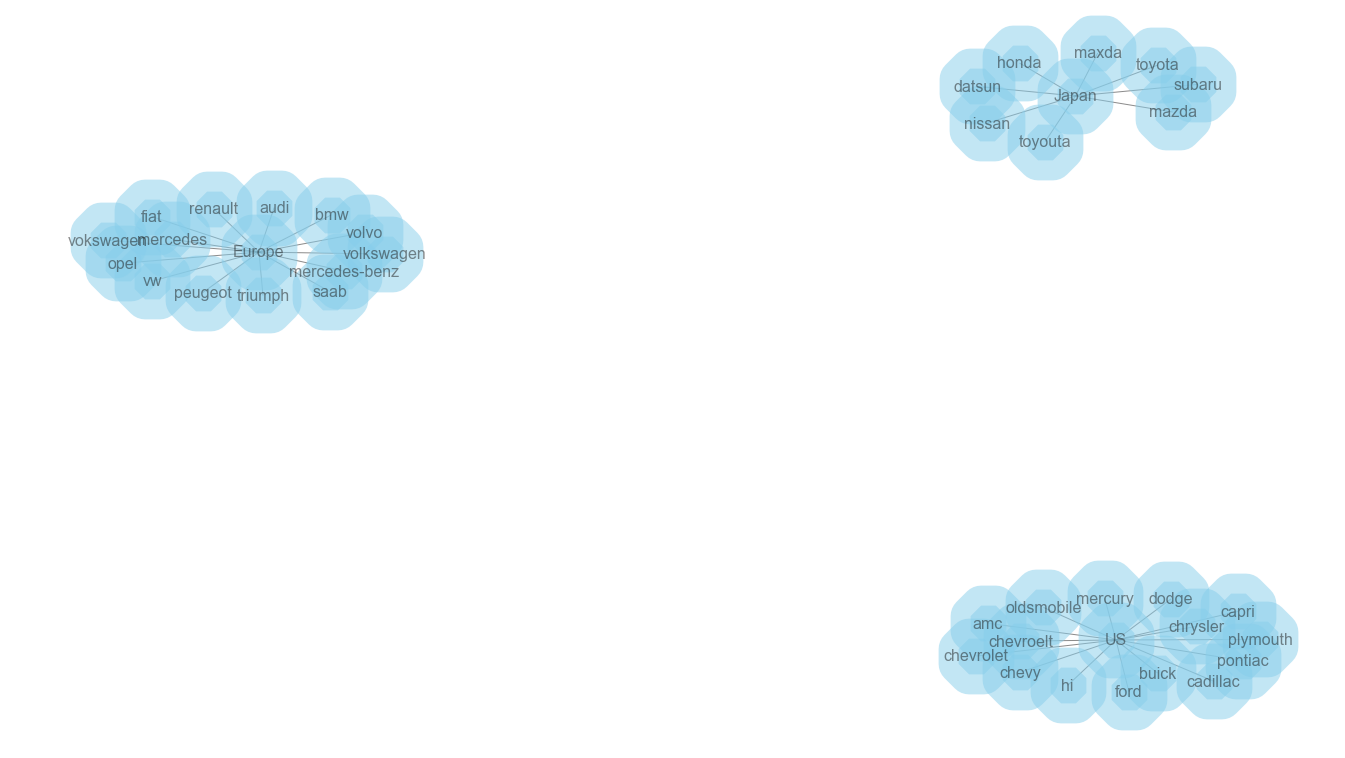

In [57]:
nx.draw(G, with_labels=True, node_size=1500, node_color="skyblue", node_shape="8", alpha=0.5, linewidths=40, font_size=16)
plt.show()

In [58]:
sns.set(style="darkgrid", font_scale=1.5)